In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
import pickle 
from yellowbrick.model_selection import LearningCurve

np.warnings.filterwarnings('ignore')


In [2]:
df_model = pd.read_csv("clean.csv")
df_model

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0,2017,0,3,34,1,0,0,0
1,1,0,2013,2,1,28,0,0,3,1
2,2,0,2014,1,3,38,0,0,2,0
3,3,1,2016,0,3,27,1,0,5,1
4,4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,4648,0,2013,0,3,26,0,0,4,0
4649,4649,1,2013,2,2,37,1,0,2,1
4650,4650,1,2018,1,3,27,1,0,5,1
4651,4651,0,2012,0,3,30,1,1,2,0


In [3]:
X = df_model.drop(["LeaveOrNot" ], axis=1)
y = df_model.LeaveOrNot

In [4]:
preprocessing_ss = Pipeline(steps=[
    ('normal', StandardScaler())])

preprocessing_mms = Pipeline(steps=[ 
   ('Minmax',MinMaxScaler())])
        

In [5]:
sm = SMOTE( sampling_strategy='auto')

In [6]:
X_train , X_test , y_train ,  y_test = train_test_split(X , y , random_state=42 , test_size=0.20)

In [7]:
pipeline_knn = Pipeline(steps = [['preprocess_min_max_scaler', preprocessing_mms],
                                    ["preprocess_standardScaler" , preprocessing_ss],
                                    ['classifier', KNeighborsClassifier(weights="uniform" , algorithm="auto" )]
                                     ])

In [8]:
pipeline_knn.fit(X_train , y_train)

Pipeline(steps=[('preprocess_min_max_scaler',
                 Pipeline(steps=[('Minmax', MinMaxScaler())])),
                ('preprocess_standardScaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [9]:
y_pred_knn = pipeline_knn.predict(X_test)

In [10]:
print("accuracy train : %.3f"%pipeline_knn.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_knn.score(X_test , y_test))

accuracy train : 0.858
accuracy test : 0.824


In [11]:
confusion_matrix(y_test, y_pred_knn)

array([[571,  39],
       [125, 196]], dtype=int64)

In [12]:
y_pred_knn = pipeline_knn.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       610
           1       0.83      0.61      0.71       321

    accuracy                           0.82       931
   macro avg       0.83      0.77      0.79       931
weighted avg       0.83      0.82      0.82       931



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

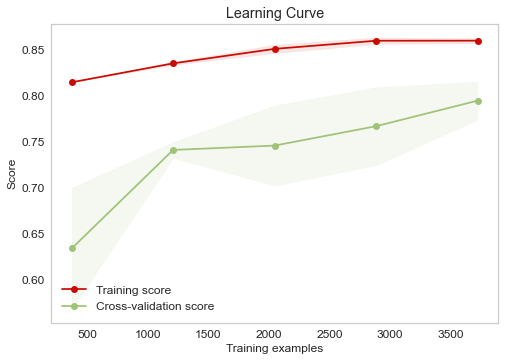

In [14]:
plot_learning_curve(pipeline_knn, X, y)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

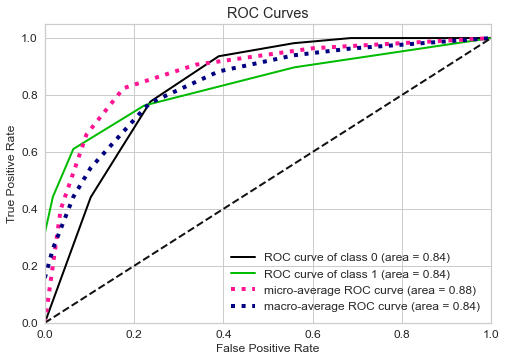

In [15]:
pipeline_knn.fit(X_train, y_train)
y_probas = pipeline_knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [16]:
with open("rfc_pickle.pkl" , "wb") as file : 
    pickle.dump(pipeline_knn , file)